# HACKATHON example notebooks - Query the cube for data

This notebook gives you an example on how to execute the following steps:
1) Prepare the environment for the use of ODC \
2) Query the datacube for satellite images \
3) Visualize satellite images \
4) Looking at available classification \
5) Filter the resulting images

# 1) Prepare the environment for the use of ODC

## 1.1) Import necessary python packages

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import rasterio. features

import numpy as np
import xarray as xr
import random as rd
import sys
import os

## 1.2) Import datacube

In [21]:
from datacube import Datacube
dc = Datacube()

In [22]:
products = dc.list_products()

# 2) Query the datacube for satellite images

## 2.1) Define the query based on the following factors: 
- the product to be used (here, only one product is available, so this will always be the same) 
- the projection to be used (for the Hackathon we recommend the use of SWEREF99 that is available under the name "epsg:3006", thus this would also be the same in all cases) 
- the position of the area we query data about (given as longitude and latitude) 
- the resolution we request 
- the time frame our query should include (given as a start date and end date) 
- the bands we query from the datacube (this will essentially tell the cube what kind of information we require, and we will get back to this later)

In [23]:
lat = (65.590962, 65.638668)
lon = (22.043322, 22.175764)

query = {
    "product": "sentinel_s2_l2a_zips",
    "output_crs": "epsg:3006",
    "lat": lat,
    "lon": lon,
    "resolution": (10, -10),
    "time": ["2019-11-01", "2019-12-01"],
    "measurements": [
        "B02_10m",
        "B03_10m",
        "B04_10m"
    ]
}

ds = dc.load(**query)

## 2.2) Looking at the result of the query

We can simply print the result of the query. If no changes were made in the query, we would see something like this here: 
<img src="Images/01_Query_Result.PNG"> 

Let us break down what this means. 
First, looking at the Dimensions tuple. Here, we see three values:
- time: the number of satellite images our query resulted in
- x: the number of pixels in one dimension of the images resulting from our query
- y: the number of pixels in the other dimension of the images resulting from our query

Looking at the Coordinates, we can see the following:
- the dates when the satellite images were made (time)
- the coordinates in two dimension 

While the Data variables section contains the values for each measurement or band. But what does this mean? We may recall from our earlier studies that the color of a pixel in most cases is stored as a triplet, where individual values give us the intensity of the pixel in the different color channels. Here, B02 contains the blue channel, B02 the red channel, and B04 the red channel. To learn more about them, go to the next cell.

In [24]:
ds

<xarray.Dataset>
Dimensions:      (time: 6, x: 668, y: 599)
Coordinates:
  * time         (time) datetime64[ns] 2019-11-01T10:31:41.680690 ... 2019-11...
  * y            (y) float64 7.292e+06 7.293e+06 ... 7.298e+06 7.298e+06
  * x            (x) float64 8.303e+05 8.303e+05 ... 8.237e+05 8.237e+05
    spatial_ref  int32 3006
Data variables:
    B02_10m      (time, y, x) uint16 7164 7152 7236 7132 ... 1154 1144 1211 1130
    B03_10m      (time, y, x) uint16 6172 6112 5932 5988 ... 783 909 944 915
    B04_10m      (time, y, x) uint16 5840 5900 5848 5876 ... 697 637 741 602
Attributes:
    crs:           epsg:3006
    grid_mapping:  spatial_ref

##

## 2.3) Measurements/Bands

Naturally, we can query other measurements or bands than just the blue, green, and red. To see what measurements are available, one can use the command below: \
measurements = dc.list_measurements()

Here, for each measurement, the number after the character "_" will tell us the resolution of the measurement, while the part before "_" will tell us what kind of measurement we are looking at. For example, AOT_10m gives us information about the Aerosol Optical Thickness. One can read more about the different products or bands on many sites, for example <a href="https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/bands/">HERE</a>.

Some layers are not listed on this website, this among others include the following
- AOT: Aerosol Optical Thickness map
- WVP: Water Vapour map 

One can read more about these products <a href="https://gdal.org/drivers/raster/sentinel2.html">HERE</a>

In [25]:
measurements = dc.list_measurements()
measurements

name   dtype units  nodata
product              measurement                                  
sentinel_s2_l2a_zips AOT_10m         AOT_10m  uint16     1       0
                     B02_10m         B02_10m  uint16     1       0
                     B03_10m         B03_10m  uint16     1       0
                     B04_10m         B04_10m  uint16     1       0
                     B08_10m         B08_10m  uint16     1       0
                     WVP_10m         WVP_10m   uint8     1       0
                     AOT_20m         AOT_20m  uint16     1       0
                     B02_20m         B02_20m  uint16     1       0
                     B03_20m         B03_20m  uint16     1       0
                     B04_20m         B04_20m  uint16     1       0
                     B05_20m         B05_20m  uint16     1       0
                     B06_20m         B06_20m  uint16     1       0
                     B07_20m         B07_20m  uint16     1       0
                     B11_20m         B11_20m  uint16     1       0
                     B12_20m         B12_20m  uint16     1       0
                     B8A_20m         B8A_20m  uint16     1       0
                     CLDPRB_20m   CLDPRB_20m   uint8     1      -1
                     SCL_20m         SCL_20m   uint8     1       0
                     SNWPRB_20m   SNWPRB_20m   uint8     1      -1
                     WVP_20m         WVP_20m   uint8     1       0
                     AOT_60m         AOT_60m  uint16     1       0
                     B01_60m         B01_60m  uint16     1       0
                     B02_60m         B02_60m  uint16     1       0
                     B03_60m         B03_60m  uint16     1       0
                     B04_60m         B04_60m  uint16     1       0
                     B05_60m         B05_60m  uint16     1       0
                     B06_60m         B06_60m  uint16     1       0
                     B07_60m         B07_60m  uint16     1       0
                     B09_60m         B09_60m  uint16     1       0
                     B11_60m         B11_60m  uint16     1       0
                     B12_60m         B12_60m  uint16     1       0
                     B8A_60m         B8A_60m  uint16     1       0
                     CLDPRB_60m   CLDPRB_60m   uint8     1      -1
                     SCL_60m         SCL_60m   uint8     1       0
                     SNWPRB_60m   SNWPRB_60m   uint8     1      -1
                     WVP_60m         WVP_60m   uint8     1       0

# 3) Visualize satellite images

## 3.1) Define helper functions for visualization

In [26]:
cmap_scl = ListedColormap(
    (
        (0, 0, 0),
        (1, 0, 0),
        (0.25, 0.25, 0.25),
        (0.5, 0.24, 0.05),
        (0, 1, 0),
        (1, 1, 0),
        (0, 0, 0.8),
        (0.46, 0.44, 0.44),
        (0.68, 0.67, 0.67),
        (0.82, 0.81, 0.81),
        (0, 0.8, 1),
        (1, 0.4, 1)
    )
)
norm_scl = BoundaryNorm(range(0, 13), cmap_scl.N)

In [27]:
def plot_rgb(ds, index, size):
    #The size parameter will tell us the size of the larger side. For this we first have to figure out which one is it
    if (ds.dims['x'] > ds.dims['y']):
        ratio = size/ds.dims['x']
        plt.figure(figsize = (size,ds.dims['y']*ratio))
    elif (ds.dims['y'] > ds.dims['x']):
        ratio = size/ds.dims['y']
        plt.figure(figsize = (ds.dims['x']*ratio,size))
    #If the sides are equal, we can use a figure with equal sides
    else:        
        plt.figure(figsize = (size,size))
    
    ax1 = plt.subplot(1,1,1)
    (ds[["B02_10m", "B03_10m", "B04_10m"]]).to_array().isel(time = index).plot.imshow(vmin=0,vmax=10000, ax=ax1)#        
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

 ## 3.2) Show the first image

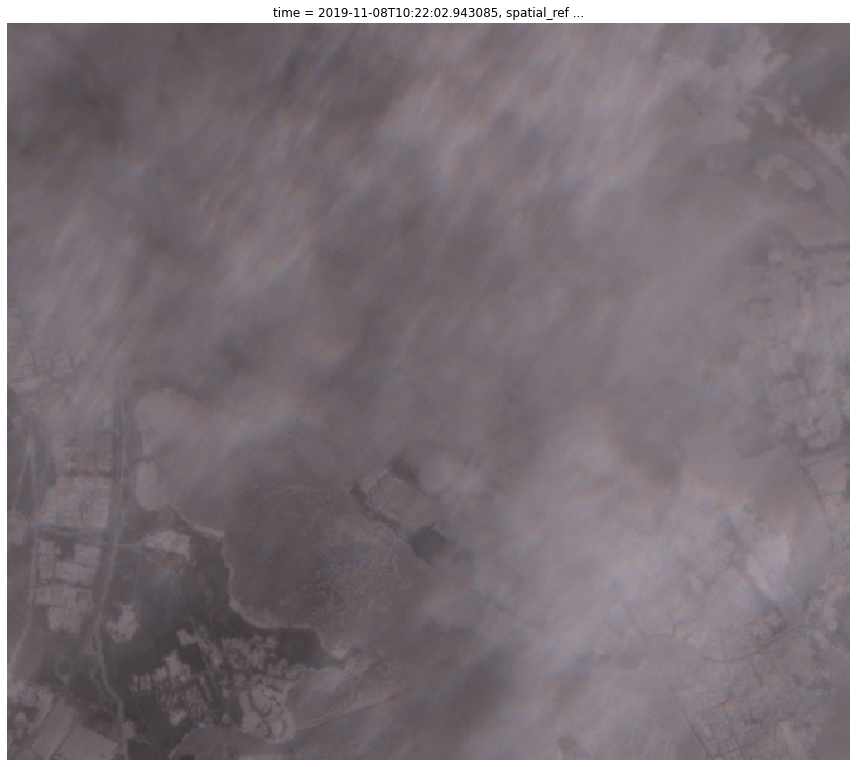

In [28]:
index = 3
plot_rgb(ds, index, 12)

## 3.3) Show all images

If nothing was changed in the original notebook, above we can see part of Luleå covered by a thin layer of clouds. Let us look at the whole series of images now.

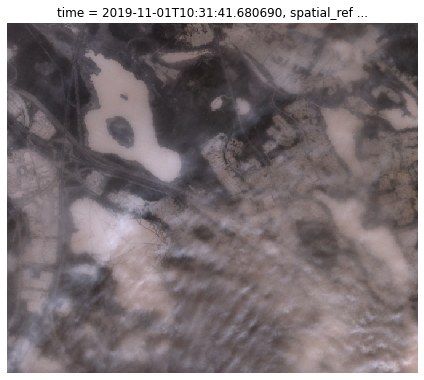

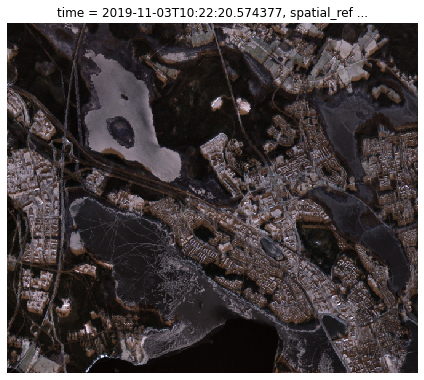

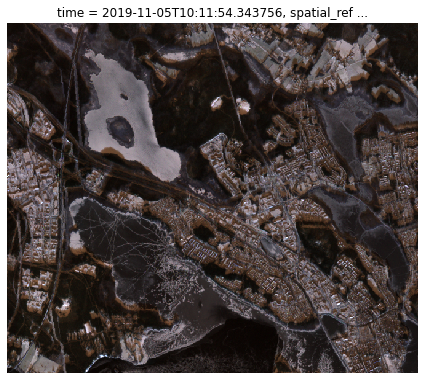

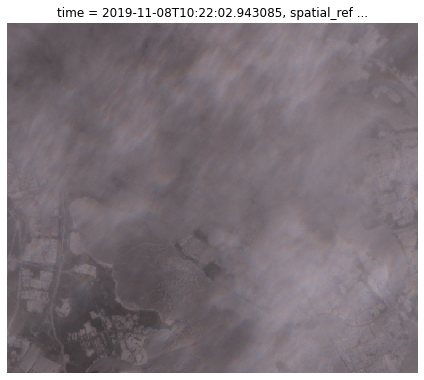

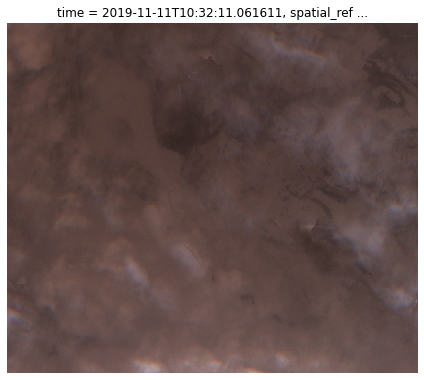

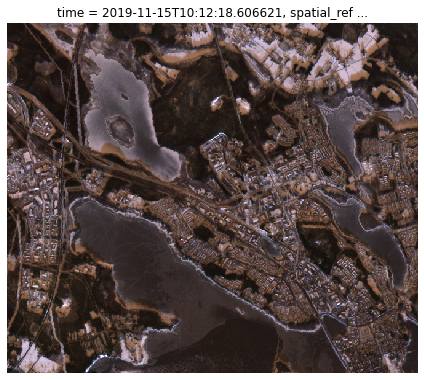

In [29]:
for index in np.arange(ds.time.size):
    plot_rgb(ds, index, 6)

# 4) Scene clasification layer

The product we use already includes a built-in classification layer. This layer can be useful for example in the snow/cloud detection task, as it contains both snow detection and cloud detection (details can be seen <a href="https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm">HERE</a>) that can be improved on. 

## 4.1) Reformulating the query

To include the scene classification layer, we should first reformulate the query in a way that we include the measurement corresponding to the scene classification layer. Unfortunately, this layer does not exist in 10m resolution. Thus for better comparison and visualization, here, we use query a lower resolution version of the RGB bands as well.

In [30]:
query_20m = {
    "product": "sentinel_s2_l2a_zips",
    "output_crs": "epsg:3006",
    "lat": lat,
    "lon": lon,
    "resolution": (20, -20),
    "time": ["2019-11-01", "2019-12-01"],
    "measurements": [
        "B02_20m",
        "B03_20m",
        "B04_20m",
        "SCL_20m"
    ]
}

ds_20m = dc.load(**query_20m)

## 4.2) Define new helper function to visualize satellite images and available classification in parallel

In [31]:
def plot_rgb_scl(ds, index):
    plt.figure(figsize=(15,9))
    
    ax1 = plt.subplot(1,2,1)
    (ds[["B02_20m", "B03_20m", "B04_20m"]]).to_array().isel(time = index).plot.imshow(vmin=0,vmax=10000, ax=ax1)#
    plt.axis("off")
    plt.title('$RGB$',fontsize=25)
    
    ax2 = plt.subplot(1,2,2)
    ds.isel(time=index).SCL_20m.plot(cmap=cmap_scl, norm=norm_scl, ax=ax2)#
    plt.title('$SCL$',fontsize=25)
    plt.axis("off")
    
    plt.suptitle(str(ds.isel(time=index).time.values), fontsize=20)
    
    plt.tight_layout()
    plt.show()

## 4.3) Display the second satellite image

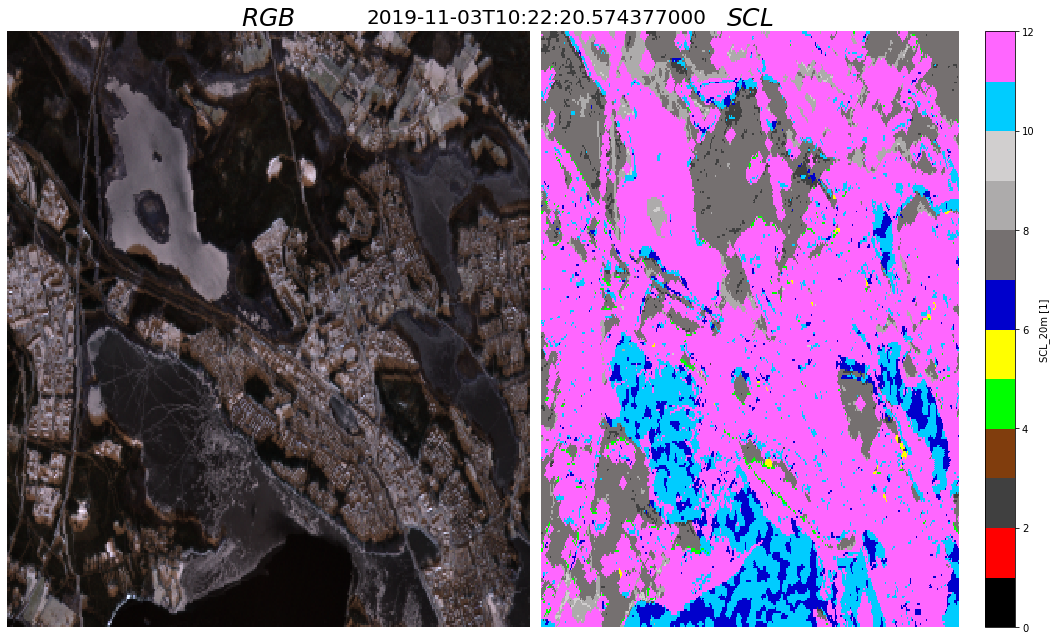

In [32]:
index = 1 
plot_rgb_scl(ds_20m, index)

## 4.4) Understanding the scene classification layer

We can see many different colours in the scene classification layer. Let us look at what these different colours mean:
<img src="Images/02_Query_CLSlegend.PNG"> 

This already shows the difficulty that is inherent in the snow/ice and cloud detection task. As here, many pixels that are seemingly part of the ice sheet covering the Lule river are detected as parts of a thin cirrus cloud

In [33]:
measurements.name.values

array(['AOT_10m', 'B02_10m', 'B03_10m', 'B04_10m', 'B08_10m', 'WVP_10m',
       'AOT_20m', 'B02_20m', 'B03_20m', 'B04_20m', 'B05_20m', 'B06_20m',
       'B07_20m', 'B11_20m', 'B12_20m', 'B8A_20m', 'CLDPRB_20m',
       'SCL_20m', 'SNWPRB_20m', 'WVP_20m', 'AOT_60m', 'B01_60m',
       'B02_60m', 'B03_60m', 'B04_60m', 'B05_60m', 'B06_60m', 'B07_60m',
       'B09_60m', 'B11_60m', 'B12_60m', 'B8A_60m', 'CLDPRB_60m',
       'SCL_60m', 'SNWPRB_60m', 'WVP_60m'], dtype=object)

# 5) Remove cloudy images

In some cases (e.g. land cover classification) cloudy images, or images occluded in different ways may not be helpful. So in some use cases we want to remove those images where we can automatically detect this problem

## 5.1) Masking valid pixels

First, we can define a function where we can decide which part of the classification layer we consdier as "valid" (interesting for our purposes)

In [34]:
def masking_valid(ds):
    W_valid = ds.SCL_20m.where((((ds.SCL_20m > 3) & (ds.SCL_20m < 7)) | (ds.SCL_20m == 11) ) ,0)
    W_valid = W_valid.where(W_valid==0,1)
    return W_valid

## 5.2) Decision about keep/remove

Here, we keep images where the ratio of valid pixels is higher than a preset constant

In [35]:
def remove_invalid(ds):
    W_valid = masking_valid(ds)
    filtered = []
    for i, clear in enumerate(W_valid.isin([1]).sum(dim=['x', 'y']) / ds.SCL_20m.isel(time=0).count(dim = ['x', 'y']) * 100):
        if clear.values > 60:
            filtered.append(i)            
            print(f"{i:2}\t{clear.values:3.0f}%\tAdded")
        else:
            print(f"{i:2}\t{clear.values:3.0f}%")
    fds = ds.isel(time = filtered)
    return filtered, fds

 0	 24%
 1	 64%	Added
 2	 68%	Added
 3	  0%
 4	 40%
 5	 75%	Added


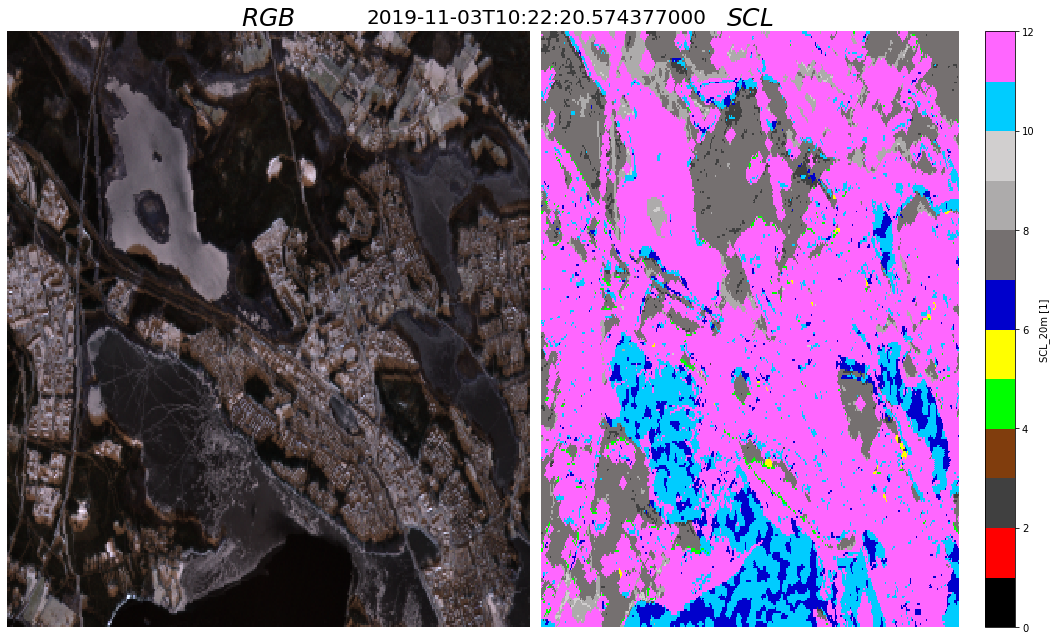

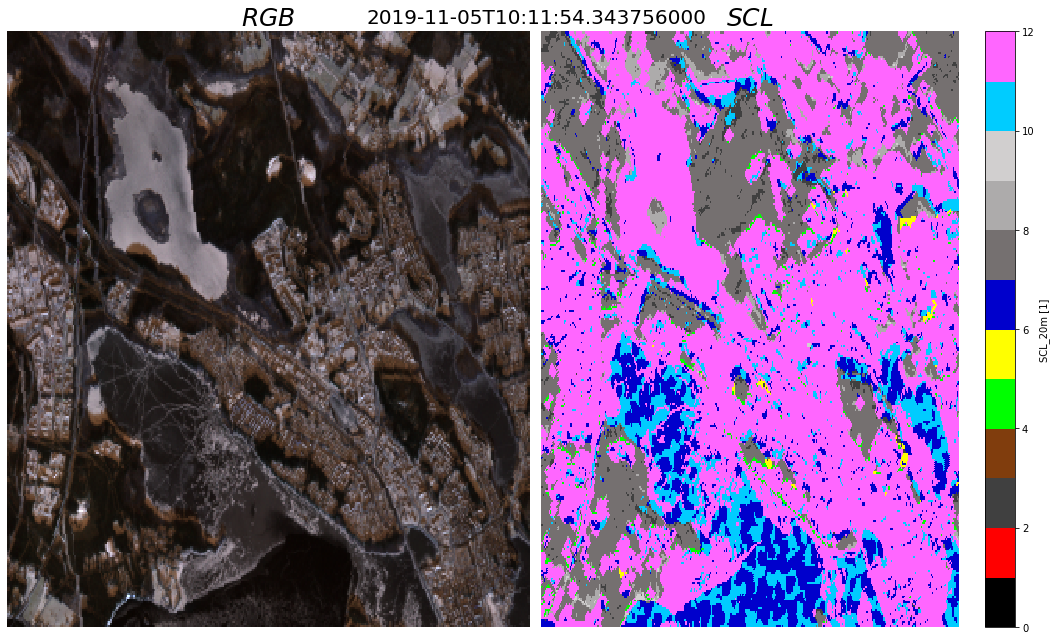

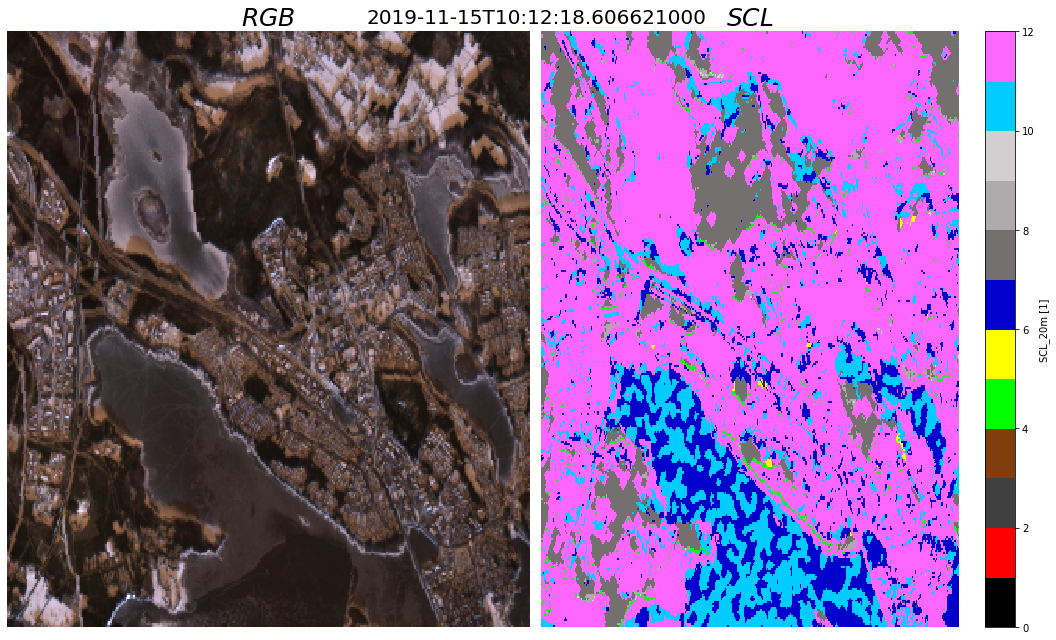

In [36]:
filtered, fds = remove_invalid(ds_20m)
for index in np.arange(fds.time.size):
    plot_rgb_scl(fds, index)

# 6) A more general function for querying data

In [37]:
def query_data(lat, lon, measurements, date_start, date_end):
    query = {
        "product": "sentinel_s2_l2a_zips",
        "output_crs": "epsg:3006",
        "lat": lat,
        "lon": lon,
        "resolution": (10, -10),
        "time": [date_start, date_end],
        "measurements": measurements
    }

    ds = dc.load(**query)
    return ds